In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from zoneinfo import ZoneInfo
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 14}) # Set global font size to 18
plt.rcParams["figure.figsize"] = (10, 6) 

dataset_path = "./data/dados_telemetria/teste_odonto_08122025/full/odonto_08122025/miguelito"

full_df = pd.read_csv(f'{dataset_path}/aceleracao2_miguelito.csv')
full_df.tail(20)

,timestamp,THROTTLE,BRAKE,ECU_MODE_ID,TORQUE_GAIN,TORQUE_REF_LEFT_MOTOR,TORQUE_REF_RIGHT_MOTOR,LEFT_MOTOR_SPEED,RIGHT_MOTOR_SPEED,ACCEL_LONGITUDINAL,...,STACK_6_CELL_4,MAX_VOLTAGE,MIN_VOLTAGE,TOTAL_VOLTAGE,SHUNT_CURRENT,BMS_MODE_ID,BMS_ERROR_ID,AIR_P,AIR_N,t
475,1765219679111,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.084424,...,3.31,3.32,3.29,79.3,-45.0,1.0,2.0,0.0,0.0,1174034
476,1765219679177,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.084424,...,3.31,3.32,3.29,79.3,-45.0,1.0,2.0,0.0,0.0,1174100
477,1765219679244,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.084424,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174167
478,1765219679278,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.032452,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174201
479,1765219679344,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.032452,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174267
480,1765219679362,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.032452,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174285
481,1765219679411,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.032452,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174334
482,1765219679429,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.071858,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174352
483,1765219679480,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.071858,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174403
484,1765219679595,0.0,0.0,0.0,0.0,0.0,0.0,36.631147,23.824597,-0.071858,...,3.31,3.32,3.29,79.4,-45.0,1.0,2.0,0.0,0.0,1174518


In [129]:
def get_range_by_time(timestamps, start_date, end_date):
    if end_date == -1 or start_date == -1:
        return range(len(timestamps))
    
    start_timestamp = start_date.timestamp() * 1000
    end_timestamp = end_date.timestamp() * 1000

    start_idx = -1
    for index, value in enumerate(timestamps):
        if value > start_timestamp:
            start_idx = index
            break

    if start_idx == -1: start_idx = 0

    end_idx = -1
    for index, value in enumerate(timestamps):
        if value > end_timestamp:
            end_idx = index
            break

    if end_idx == -1: end_idx = len(timestamps) - 1

    return range(start_idx, end_idx)

START_DATE = datetime(2025, 12, 8, 17, 10, 40, tzinfo=ZoneInfo("America/Sao_Paulo"))
END_DATE = datetime(2025, 12, 8, 17, 11, 5, tzinfo=ZoneInfo("America/Sao_Paulo"))
END_DATE = -1

range_plot = get_range_by_time(full_df['timestamp'], START_DATE, END_DATE)
timestamps_plot = full_df['timestamp'][range_plot] / 1000

# Convert Unix timestamps to datetime objects
dates_plot = [datetime.fromtimestamp(ts) for ts in timestamps_plot]


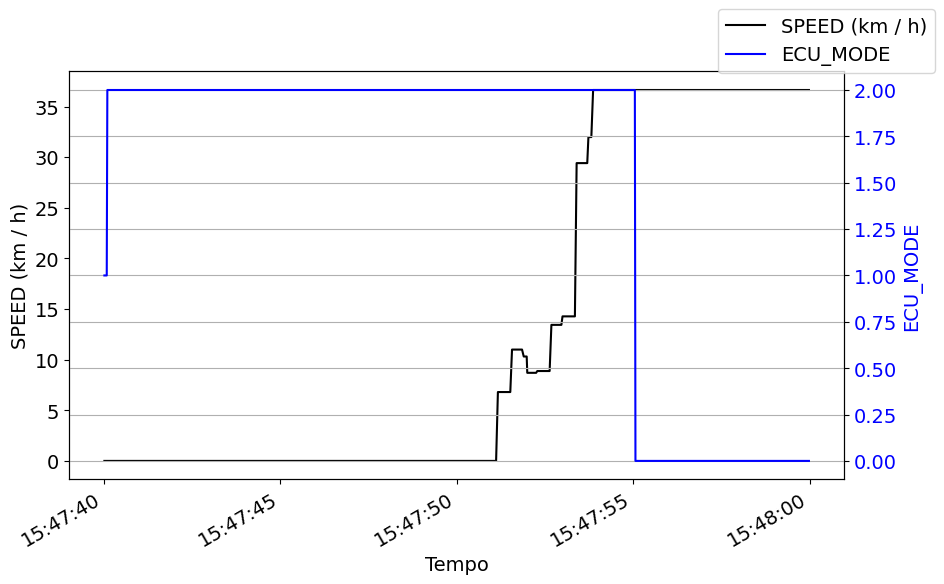

In [130]:
car_velocity = full_df['LEFT_MOTOR_SPEED']
mode = full_df['ECU_MODE_ID'] 

# Create the plot
fig, ax1 = plt.subplots()
ax1.plot(dates_plot, car_velocity[range_plot], color="black", label="SPEED (km / h)")
ax1.set_xlabel('Tempo')
ax1.set_ylabel('SPEED (km / h)', color='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

ax2.plot(dates_plot, mode[range_plot], color="blue", label="ECU_MODE")
ax2.set_ylabel('ECU_MODE', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

date_format = mdates.DateFormatter("%H:%M:%S")
ax1.xaxis.set_major_formatter(date_format)

# Optional: Rotate x-axis labels for better readability if they overlap
fig.autofmt_xdate()

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

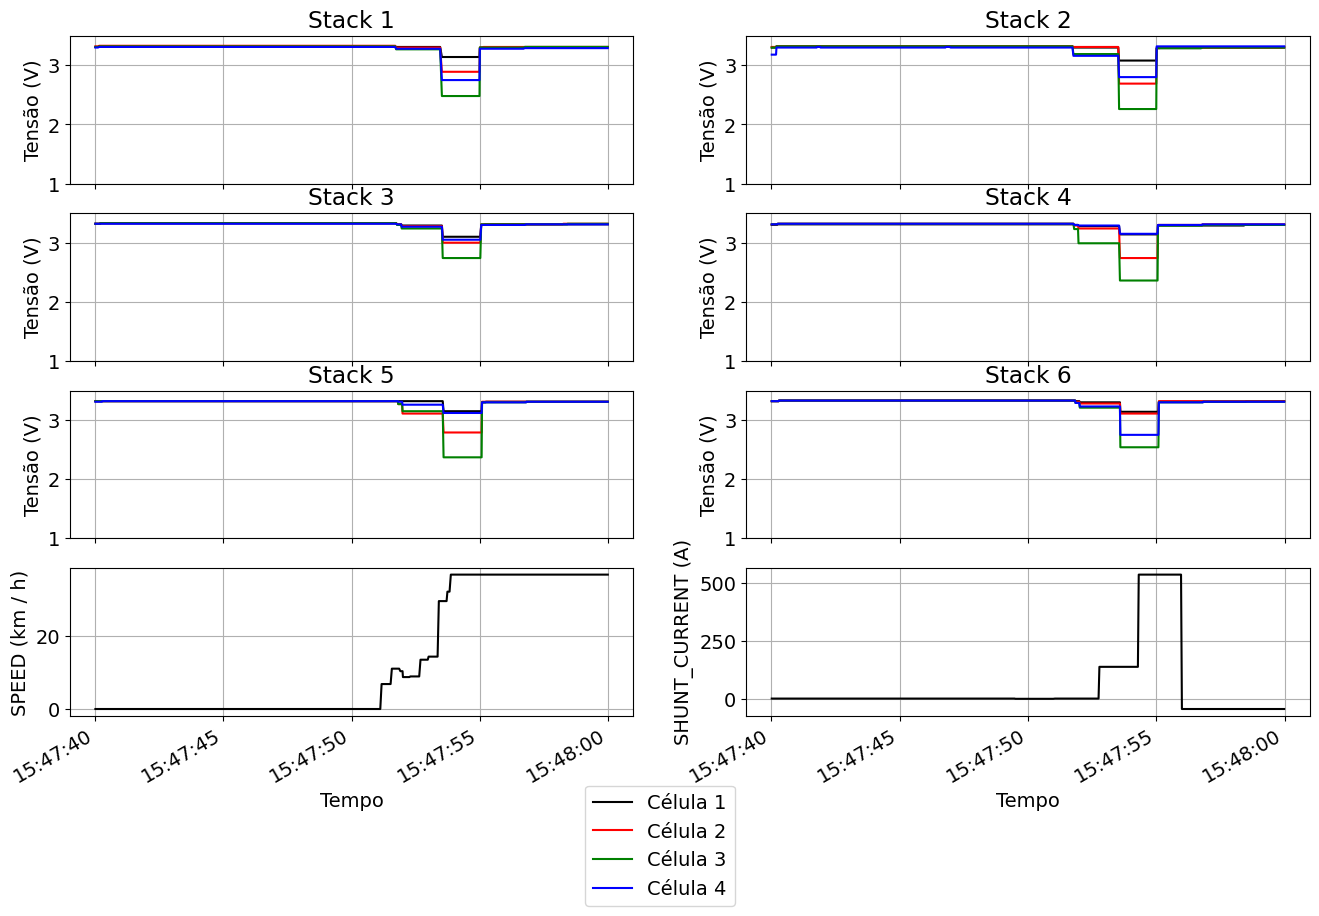

In [131]:
fig, axs = plt.subplots(4,2, figsize=(16,10)) # Adjust figsize as needed

Y_LIM_RANGE = (1, 3.5)

axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_1'][range_plot], color="black", label='Célula 1')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_2'][range_plot], color="red", label='Célula 2')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_3'][range_plot], color="green", label='Célula 3')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_4'][range_plot], color="blue", label='Célula 4')
axs[0,0].set_xlabel('Tempo')
axs[0,0].set_ylabel('Tensão (V)', color='black')
axs[0,0].set_ylim(Y_LIM_RANGE)
axs[0,0].set_title('Stack 1')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].grid()

axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_1'][range_plot], color="black")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_2'][range_plot], color="red")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_3'][range_plot], color="green")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_4'][range_plot], color="blue")
axs[0,1].set_xlabel('Tempo')
axs[0,1].set_ylabel('Tensão (V)', color='black')
axs[0,1].set_title('Stack 2')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_ylim(Y_LIM_RANGE)
axs[0,1].grid()

axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_1'][range_plot], color="black")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_2'][range_plot], color="red")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_3'][range_plot], color="green")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_4'][range_plot], color="blue")
axs[1,0].set_xlabel('Tempo')
axs[1,0].set_ylabel('Tensão (V)', color='black')
axs[1,0].set_title('Stack 3')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_ylim(Y_LIM_RANGE)
axs[1,0].grid()

axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_1'][range_plot], color="black")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_2'][range_plot], color="red")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_3'][range_plot], color="green")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_4'][range_plot], color="blue")
axs[1,1].set_xlabel('Tempo')
axs[1,1].set_ylabel('Tensão (V)', color='black')
axs[1,1].set_title('Stack 4')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_ylim(Y_LIM_RANGE)
axs[1,1].grid()

axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_1'][range_plot], color="black")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_2'][range_plot], color="red")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_3'][range_plot], color="green")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_4'][range_plot], color="blue")
axs[2,0].set_xlabel('Tempo')
axs[2,0].set_ylabel('Tensão (V)', color='black')
axs[2,0].set_title('Stack 5')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[2,0].xaxis.set_major_formatter(date_format)
axs[2,0].set_ylim(Y_LIM_RANGE)
axs[2,0].grid()

axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_1'][range_plot], color="black")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_2'][range_plot], color="red")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_3'][range_plot], color="green")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_4'][range_plot], color="blue")
axs[2,1].set_xlabel('Tempo')
axs[2,1].set_ylabel('Tensão (V)', color='black')
axs[2,1].set_title('Stack 6')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[2,1].xaxis.set_major_formatter(date_format)
axs[2,1].set_ylim(Y_LIM_RANGE)
axs[2,1].grid()

axs[3,0].plot(dates_plot, car_velocity[range_plot], color="black")
axs[3,0].set_xlabel('Tempo')
axs[3,0].set_ylabel('SPEED (km / h)', color='black')
axs[3,0].grid()

axs[3,1].plot(dates_plot, full_df['SHUNT_CURRENT'][range_plot], color="black")
axs[3,1].set_xlabel('Tempo')
axs[3,1].set_ylabel('SHUNT_CURRENT (A)', color='black')
axs[3,1].grid()

# Optional: Rotate x-axis labels for better readability if they overlap
fig.autofmt_xdate()

# Optional: align legends
fig.legend(loc='lower center')
plt.show()

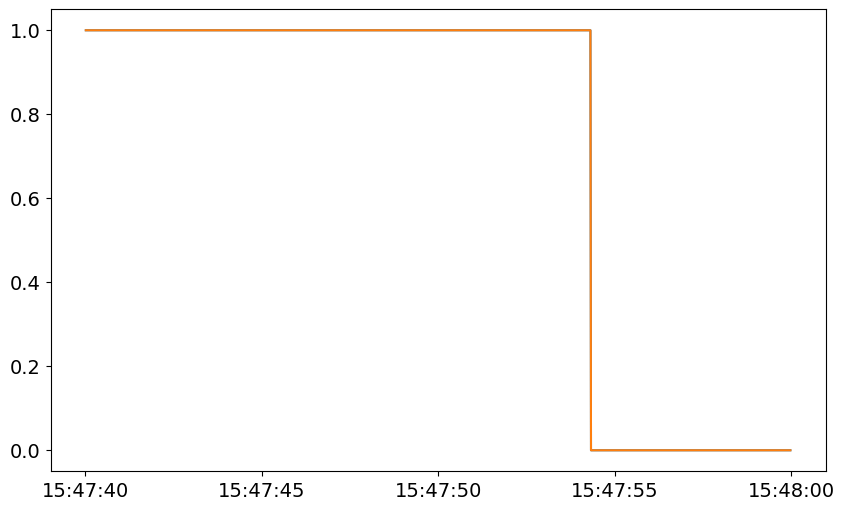

In [132]:
plt.plot(dates_plot, full_df['AIR_P'][range_plot])
plt.plot(dates_plot, full_df['AIR_N'][range_plot])
plt.show()